In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import zscore

In [48]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [49]:
num_col = df_train.dtypes[df_train.dtypes != object].index
z = np.abs(zscore(df_train[num_col]))
row, col = np.where(z > 4)
df = pd.DataFrame({"row": row, "col": col})
rows_count = df.groupby(['row']).count()

outliers = rows_count[rows_count.col > 2].index
df_train.drop(outliers, inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
df_train.columns
print(df_train.shape)
print(df_test.shape)

(1453, 81)
(1459, 80)


In [6]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Correlation

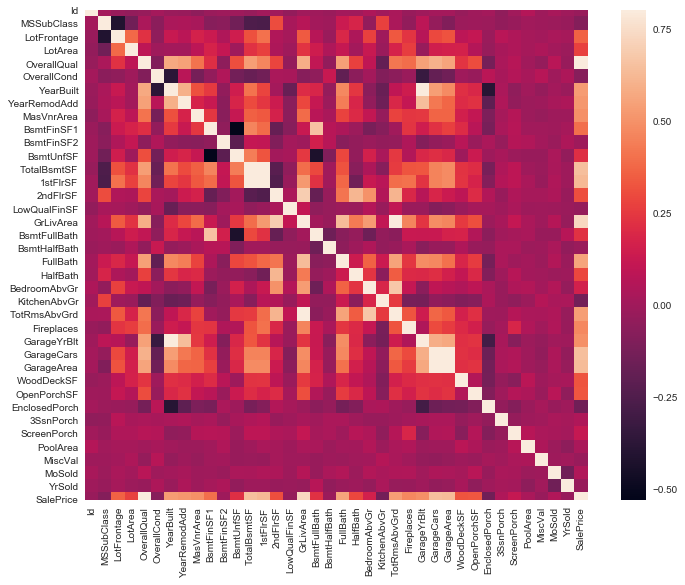

In [7]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

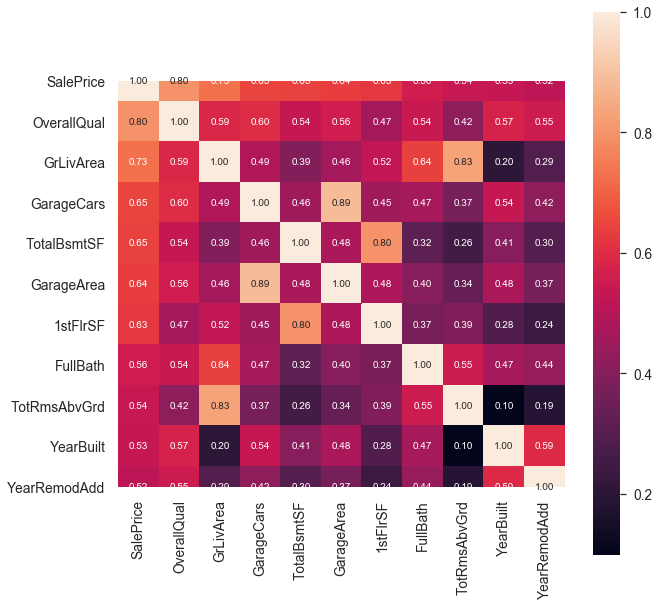

In [8]:
plt.figure(figsize=(10,10))
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

(-0.5, 9.5, 0, 800000)

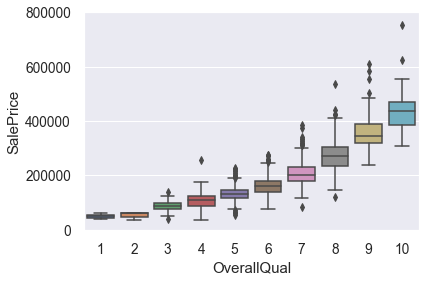

In [9]:
sns.boxplot(df_train.OverallQual, df_train.SalePrice)
plt.axis(ymin=0, ymax=800000)

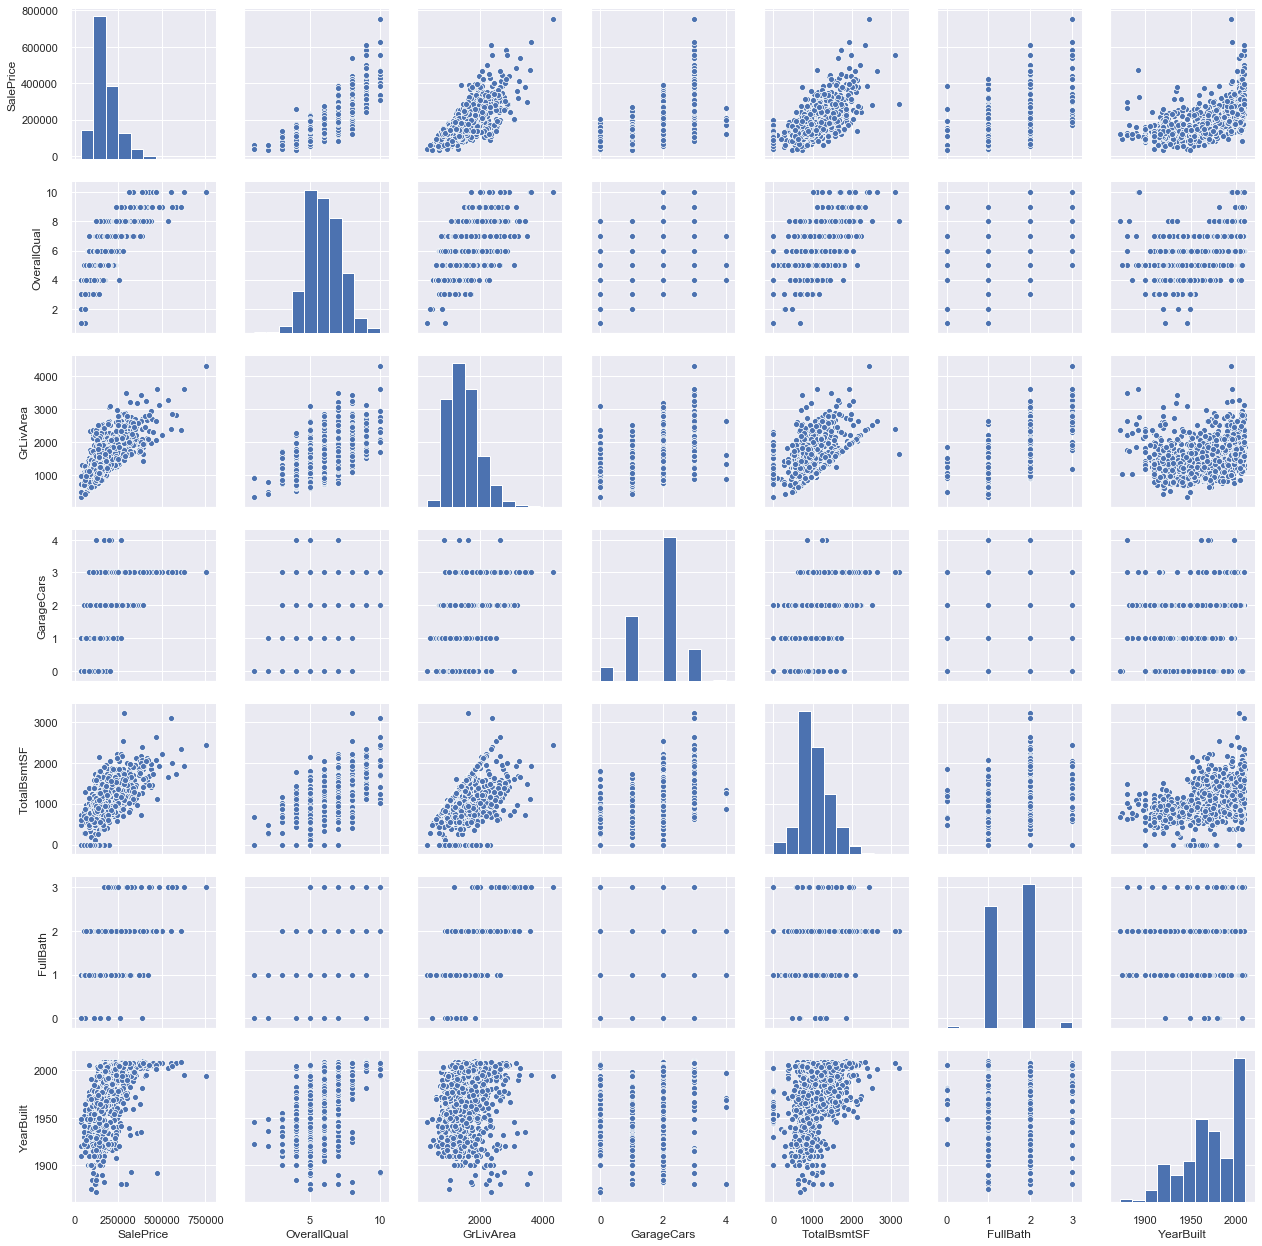

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

# Remove outliers

(134.89014336917558, 4515.109856630825, 0, 800000)

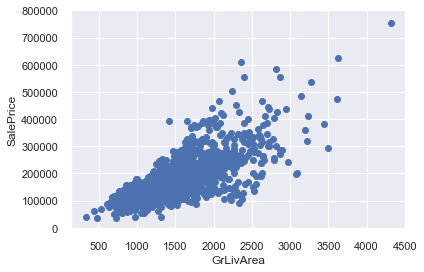

In [11]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.axis(ymin=0, ymax=800000)

In [12]:
df_train = df_train.drop(df_train[(df_train.GrLivArea>4000) & (df_train.SalePrice<300000)].index)

(-160.30985663082438, 3366.309856630824, 0, 800000)

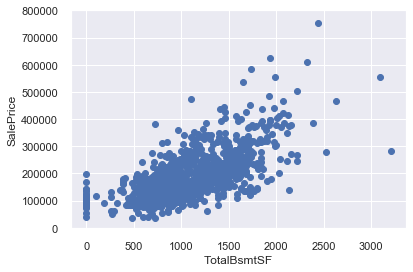

In [13]:
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.axis(ymin=0, ymax=800000)

# Normalize Sale Price

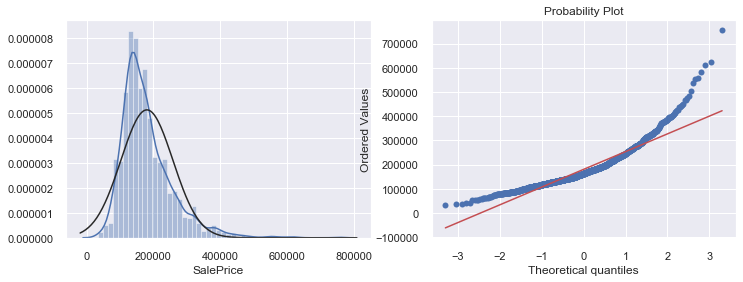

In [14]:
# SalePrice
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=norm)
plt.subplot(1,2,2)
_= stats.probplot(df_train.SalePrice, plot=plt)

In [15]:
df_train.SalePrice = np.log1p(df_train.SalePrice)

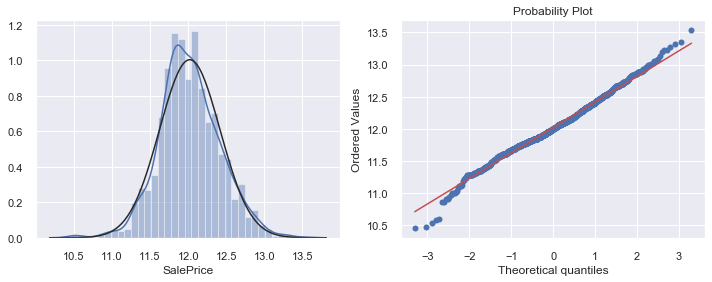

In [16]:
# SalePrice
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=norm)
plt.subplot(1,2,2)
_= stats.probplot(df_train.SalePrice, plot=plt)

# Combine training and test to do feature engineering

In [17]:
train_id = df_train.Id
test_id  = df_test.Id

nrow_train = df_train.shape[0]
nrow_test  = df_test.shape[0]

df_train.drop('Id',axis=1,inplace = True)
df_test.drop('Id',axis=1,inplace = True)
y_train = df_train.SalePrice.values
df_train.drop('SalePrice',axis=1,inplace = True)

In [18]:
full_data = pd.concat((df_train, df_test),sort=False).reset_index(drop=True)

# Missing data

In [19]:
total = full_data.isnull().sum().sort_values(ascending=False)
percent = (full_data.isnull().sum()/full_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)
# There are 34 features that have at least one missing data

,Total,Percent
PoolQC,2905,0.997596
MiscFeature,2807,0.963942
Alley,2715,0.932349
Fence,2343,0.804602
FireplaceQu,1419,0.487294
LotFrontage,485,0.166552
GarageCond,158,0.054258
GarageQual,158,0.054258
GarageYrBlt,158,0.054258
GarageFinish,158,0.054258


In [20]:
# PoolQC
# Since their ExterQual and ExterCond are 'TA', we put the PoolQC as 'TA'
full_data.loc[(full_data.PoolArea > 0) & (full_data.PoolQC.isnull()), 'PoolQC'] = 'TA'
full_data.PoolQC.fillna('None',inplace=True)

In [21]:
# MiscFeature
full_data.MiscFeature.fillna('None',inplace=True)

In [22]:
# Alley
full_data.Alley.fillna('None',inplace=True)

In [23]:
# Fence
full_data.Fence.fillna('None',inplace=True)

In [24]:
# FireplaceQu
full_data.FireplaceQu.fillna('None',inplace=True)

In [25]:
# LotFrontage 
# Two option here, we can try it later
full_data.LotFrontage = full_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#full_data.LotFrontage.fillna(0, inplace=True)

In [26]:
# Garage features part I
# There are two special cases
# Impute those two special cases with OverallCond
full_data.loc[(full_data.GarageCond.isnull()) & (full_data.OverallCond==8) & (full_data.GarageArea==360.0),\
      ['GarageFinish','GarageQual','GarageCond','GarageYrBlt']] =\
[full_data[full_data['OverallCond']==8]['GarageFinish'].mode()[0],
full_data[full_data['OverallCond']==8]['GarageQual'].mode()[0],
full_data[full_data['OverallCond']==8]['GarageCond'].mode()[0],
1910]
full_data.loc[(full_data.GarageCond.isnull()) & (full_data.OverallCond==6) &\
            (full_data.YearBuilt==1923) & (full_data.GarageType=='Detchd'),\
            ['GarageCond','GarageYrBlt','GarageFinish','GarageQual','GarageArea','GarageCars']] =\
[full_data[full_data['OverallCond']==6]['GarageCond'].mode()[0],
 1923,
 full_data[full_data['OverallCond']==6]['GarageFinish'].mode()[0],
 full_data[full_data['OverallCond']==6]['GarageQual'].mode()[0],
 full_data[full_data['OverallCond']==6]['GarageArea'].median(),
 full_data[full_data['OverallCond']==6]['GarageCars'].median()
]

In [27]:
# Garage features part II
for col in ('GarageCond','GarageType','GarageFinish','GarageQual'):
    full_data[col].fillna('None',inplace=True)

full_data.GarageYrBlt.fillna(0.0,inplace=True)


In [28]:
# Basement
for col in ('BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual'):
    full_data[col].fillna('None',inplace=True)
    
for col in ('BsmtFullBath','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtUnfSF','BsmtHalfBath'):
    full_data[col].fillna(0.0,inplace=True)

In [29]:
# MasVnrType, MasVnrArea
full_data.MasVnrType.fillna('None',inplace=True)
full_data.MasVnrArea.fillna(0.0,inplace=True)

In [30]:
# MSZoning
full_data.loc[(full_data.MSSubClass==20)&(full_data.MSZoning.isnull()),'MSZoning'] = 'RL'
full_data.loc[(full_data.MSSubClass==30)&(full_data.MSZoning.isnull()),'MSZoning'] = 'RM'
full_data.loc[(full_data.MSSubClass==70)&(full_data.MSZoning.isnull()),'MSZoning'] = 'RM'

In [31]:
# Utilities 
# There are only 1 NoSeWa and 2 Nan. Also, the NoSeWa is in the test set, so this feature won't help in prediction
full_data = full_data.drop(['Utilities'], axis=1)

In [32]:
# Functional
full_data.Functional.fillna('Typ',inplace=True)

In [33]:
# SaleType
full_data.SaleType.fillna(full_data.SaleType.mode()[0],inplace=True)

In [34]:
# Exterior1st, Exterior2nd
full_data.Exterior1st.fillna(full_data.Exterior1st[(full_data.OverallCond==7)&(full_data.OverallQual==5)].mode()[0],inplace=True)
full_data.Exterior2nd.fillna(full_data.Exterior2nd[(full_data.OverallCond==7)&(full_data.OverallQual==5)].mode()[0],inplace=True)


In [35]:
# KitchenQual
full_data.KitchenQual.fillna(full_data.KitchenQual[(full_data.OverallCond==3)&(full_data.OverallQual==5)].mode()[0],inplace=True)


In [36]:
# Electrical
full_data.Electrical.fillna(full_data.Electrical[(full_data.OverallCond==5)&(full_data.OverallQual==5)].mode()[0]\
                           ,inplace=True)

In [37]:
# There is a strange GarageYrBlt, modify it
full_data.loc[full_data['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

In [38]:
# Make sure missing data are all gone
total = full_data.isnull().sum().sort_values(ascending=False)
percent = (full_data.isnull().sum()/full_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total!=0]

,Total,Percent


# Transform nominal columns to correct type

In [39]:
temp = full_data.copy()

In [40]:
full_data.OverallCond = full_data.OverallCond.astype(str)
full_data.OverallQual = full_data.OverallQual.astype(str)
full_data.MSSubClass = full_data.MSSubClass.astype(str)
#full_data.YrSold = full_data.YrSold.astype(str)
#full_data.MoSold = full_data.MoSold.astype(str)

In [41]:
#from sklearn.preprocessing import LabelEncoder
#catecols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#for i in catecols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(full_data[i].values)) 
#    full_data[i] = lbl.transform(list(full_data[i].values))

# Add Additional Features

In [42]:
full_data['TotalLivSF'] = full_data['BsmtFinSF1'] + full_data['BsmtFinSF2'] + full_data['1stFlrSF'] + full_data['2ndFlrSF']
full_data['Total_Bath'] = (full_data['FullBath'] + (0.5*full_data['HalfBath']) +\
                       full_data['BsmtFullBath'] + (0.5*full_data['BsmtHalfBath']))

full_data['2ndFL'] = full_data['2ndFlrSF'].apply(lambda x: 'Y' if x > 0 else 'N')
full_data['bsmt'] = full_data['TotalBsmtSF'].apply(lambda x: 'Y' if x > 0 else 'N')

#full_data['TotalPorchSF'] = (full_data['OpenPorchSF'] + full_data['3SsnPorch'] +\
#                              full_data['EnclosedPorch'] + full_data['ScreenPorch'] +\
#                             full_data['WoodDeckSF'])
drop_fea1 = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath',
            'HalfBath','BsmtFullBath','BsmtHalfBath']
#drop_fea2 = ['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
full_data.drop(drop_fea1,axis=1,inplace=True)

# Reduce Skewness using Box Cox

In [43]:
num_cols = full_data.dtypes[full_data.dtypes != "object"].index
skewed_cols = full_data[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewed_cols = skewed_cols[abs(skewed_cols) > 0.75]
skewed_features = skewed_cols.index
lam = 0.15
for feat in skewed_features:
    full_data[feat] = boxcox1p(full_data[feat], boxcox_normmax(full_data[feat]+1))
#    df_train[feat] = boxcox1p(df_train[feat], lam)
    
full_data[skewed_features] = np.log1p(full_data[skewed_features])

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


# Scale numeric columns

In [44]:
# Scale numeric columns
scaler = StandardScaler()
#scaler = preprocessing.RobustScaler()
full_data[num_cols] = scaler.fit_transform(full_data[num_cols])

# Dummify categorical features

In [45]:
cate_col = full_data.dtypes[full_data.dtypes == object].index
dummies_drop = [i + '_'+ full_data[i].value_counts().index[0] for i in cate_col]
full_data = pd.get_dummies(full_data)
full_data.drop(dummies_drop,axis=1)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalLivSF,Total_Bath,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,GarageFinish_RFn,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,PavedDrive_N,PavedDrive_P,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,2ndFL_Y,bsmt_N
0,-0.043605,-0.083013,1.046865,0.897537,1.232536,-0.259686,-0.448092,-0.114834,0.586247,0.174818,-0.192986,1.000862,-0.923969,0.245398,0.307366,0.353058,-0.947060,0.856289,-0.429086,-0.113279,-0.309184,-0.058672,-0.191128,-1.553614,0.155887,0.734429,1.595725,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.578541,0.164971,0.154765,-0.394159,-0.799890,0.047853,0.503002,-0.114834,-0.352960,0.174818,-0.192986,-0.284479,0.627702,0.237360,0.307366,-0.057441,1.234087,-1.093131,-0.429086,-0.113279,-0.309184,-0.058672,-0.191128,-0.448012,-0.604486,0.529098,0.353942,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.091643,0.470572,0.980783,0.849696,1.175287,0.251531,-0.298166,-0.114834,0.718493,0.174818,-0.192986,-0.284479,0.627702,0.244807,0.307366,0.632944,-0.947060,0.717979,-0.429086,-0.113279,-0.309184,-0.058672,-0.191128,1.026124,0.155887,0.567680,1.595725,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.283602,0.154859,-1.860720,-0.681203,-0.799890,0.356318,-0.682352,-0.114834,0.598693,0.174818,-0.192986,0.358191,0.627702,0.243918,1.621683,0.791547,-0.947060,0.649932,2.630781,-0.113279,-0.309184,-0.058672,-0.191128,-1.553614,-1.364859,0.126079,-0.266949,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0.724635,0.922120,0.947743,0.754015,1.405280,0.309739,0.228918,-0.114834,1.342507,1.398543,-0.192986,1.643532,0.627702,0.244510,1.621683,1.696512,1.083513,0.973844,-0.429086,-0.113279,-0.309184,-0.058672,-0.191128,2.131726,0.155887,1.182362,1.595725,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0.760066,0.902782,0.716457,0.514812,-0.799890,-0.672100,-0.588648,-0.114834,-0.114635,-2.272632,-0.192986,-0.927149,-0.923969,0.242434,0.307366,0.035854,0.544645,0.592152,-0.429086,9.288889,-0.309184,-0.058672,5.193901,1.394658,0.916260,0.345294,0.353942,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0.385235,0.260054,1.079906,0.993218,1.216826,0.100694,1.496262,-0.114834,0.557587,0.174818,-0.192986,0.358191,0.627702,0.245694,0.307366,0.763558,1.180736,0.831251,-0.429086,-0.113279,-0.309184,-0.058672,-0.191128,0.657590,-0.604486,1.372324,0.974833,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.578541,0.316221,0.055643,-0.537681,1.293116,-0.083858,0.139899,-0.114834,1.192122,0.174818,-0.192986,0.358191,2.179374,0.236460,0.307366,0.054513,1.152761,1.295488,2.561026,-0.113279,-0.309184,-0.058672,4.928600,1.763192,0.916260,1.299842,1.595725,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,-0.771149

# Get back train and test set

In [46]:
train = full_data[:nrow_train]
test = full_data[nrow_train:]

In [47]:
train.to_csv('train_mod.csv', index=False)
test.to_csv('test_mod.csv', index=False)
y_train =pd.DataFrame(y_train,columns=['SalePrice'])
y_train.to_csv('y_train.csv',index=False)